# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [ ]:
Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [2]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.3.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [6]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [7]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

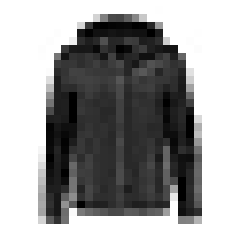

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [12]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

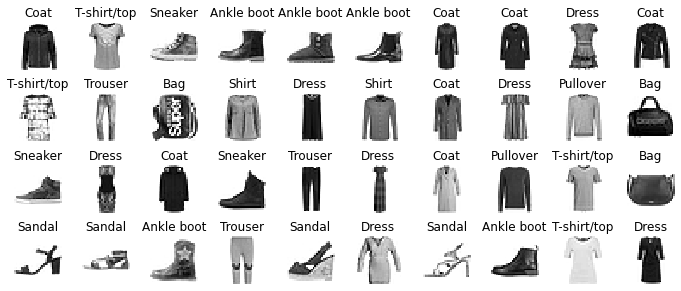

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer(hidden1.name) is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[ 0.02282339,  0.04081745,  0.04846844, ...,  0.05962984,
         0.02197083,  0.00761474],
       [-0.02309117, -0.02491381, -0.009307  , ..., -0.02575801,
         0.00271219,  0.01426959],
       [-0.05800051, -0.0297723 , -0.04157215, ...,  0.06788224,
         0.0042022 ,  0.03505573],
       ...,
       [-0.07360021, -0.06112321, -0.01277927, ..., -0.02398342,
         0.02341049,  0.00022396],
       [ 0.06388012, -0.04259125, -0.05805935, ...,  0.00243938,
         0.06982724, -0.01298322],
       [-0.00240494, -0.0247171 ,  0.04192638, ...,  0.06096014,
         0.07312292,  0.00235101]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [30]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7189 - accuracy: 0.7634 - val_loss: 0.4997 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4874 - accuracy: 0.8304 - val_loss: 0.4521 - val_accuracy: 0.8464
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4424 - accuracy: 0.8437 - val_loss: 0.4080 - val_accuracy: 0.8614
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4153 - accuracy: 0.8535 - val_loss: 0.4026 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3964 - accuracy: 0.8609 - val_loss: 0.3946 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3789 - accuracy: 0.8667 - val_loss: 0.3788 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3657 - accuracy: 0.8706 - val_loss: 0.3708 - val_accuracy:

In [31]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [32]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

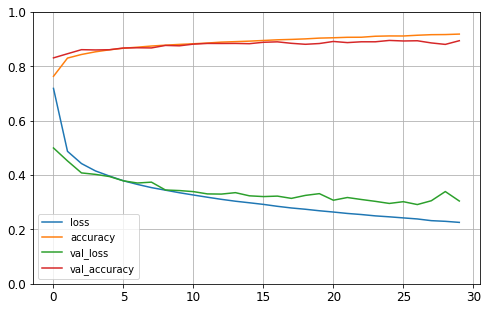

In [34]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8863


[0.32713863253593445, 0.8863000273704529]

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

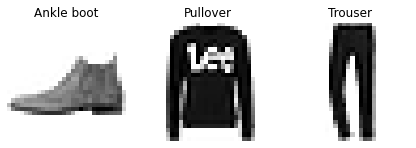

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

In [41]:
# Using Adam Optimizer

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [42]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3741 - accuracy: 0.8630 - val_loss: 0.3713 - val_accuracy: 0.8690
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3308 - accuracy: 0.8784 - val_loss: 0.3225 - val_accuracy: 0.8834
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3035 - accuracy: 0.8877 - val_loss: 0.3357 - val_accuracy: 0.8818
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2862 - accuracy: 0.8949 - val_loss: 0.3185 - val_accuracy: 0.8824
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2746 - accuracy: 0.8972 - val_loss: 0.3040 - val_accuracy: 0.8922
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2601 - accuracy: 0.9027 - val_loss: 0.3039 - val_accuracy: 0.8882
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2511 - accuracy: 0.9061 - val_loss: 0.3232 - val_accuracy:

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.8905


[0.458644300699234, 0.890500009059906]

In [44]:
# Using the RMSprop Optimizes
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [45]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1249 - accuracy: 0.9539 - val_loss: 0.5452 - val_accuracy: 0.8990
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1297 - accuracy: 0.9525 - val_loss: 0.5992 - val_accuracy: 0.8948
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1380 - accuracy: 0.9503 - val_loss: 0.6701 - val_accuracy: 0.8970
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1474 - accuracy: 0.9474 - val_loss: 0.7173 - val_accuracy: 0.8930
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1495 - accuracy: 0.9478 - val_loss: 0.7550 - val_accuracy: 0.8960
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1544 - accuracy: 0.9474 - val_loss: 0.7908 - val_accuracy: 0.8886
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1558 - accuracy: 0.9476 - val_loss: 0.8721 - val_accuracy:

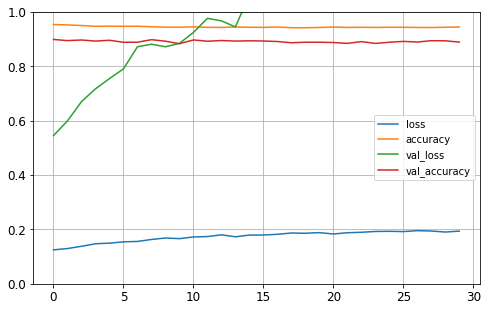

In [46]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 1.1656 - accuracy: 0.8797


[1.1656304597854614, 0.8797000050544739]

In [48]:
# 2) Plot Learning curves when using different batch size

# As we know the rule of Batch size should be always the power of 2 and it depends on the size of the data ( 2**6, 2**7. 2**8 ...)

In [49]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [50]:
# firstly we'll use the 2**6
history4 = model.fit(X_train, y_train, batch_size=64, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 4s 5ms/step - loss: 0.1818 - accuracy: 0.9463 - val_loss: 1.0408 - val_accuracy: 0.8936
Epoch 2/30
860/860 [==============================] - 4s 5ms/step - loss: 0.1598 - accuracy: 0.9497 - val_loss: 1.0099 - val_accuracy: 0.8916
Epoch 3/30
860/860 [==============================] - 4s 5ms/step - loss: 0.1767 - accuracy: 0.9454 - val_loss: 0.8589 - val_accuracy: 0.8928
Epoch 4/30
860/860 [==============================] - 4s 5ms/step - loss: 0.1448 - accuracy: 0.9507 - val_loss: 0.8723 - val_accuracy: 0.8926
Epoch 5/30
860/860 [==============================] - 5s 5ms/step - loss: 0.1503 - accuracy: 0.9501 - val_loss: 0.8975 - val_accuracy: 0.8930
Epoch 6/30
860/860 [==============================] - 5s 5ms/step - loss: 0.1362 - accuracy: 0.9534 - val_loss: 0.8561 - val_accuracy: 0.8954
Epoch 7/30
860/860 [==============================] - 4s 5ms/step - loss: 0.1284 - accuracy: 0.9544 - val_loss: 0.9757 - val_accuracy: 0.8900
Epoch 

In [51]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.9455 - accuracy: 0.8903


[0.9455108642578125, 0.8902999758720398]

In [52]:
# Batch size = 2 ** 7
history5 = model.fit(X_train, y_train, batch_size=128, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
430/430 [==============================] - 3s 7ms/step - loss: 0.0566 - accuracy: 0.9787 - val_loss: 0.9504 - val_accuracy: 0.9018
Epoch 2/30
430/430 [==============================] - 3s 7ms/step - loss: 0.0503 - accuracy: 0.9808 - val_loss: 0.9787 - val_accuracy: 0.9006
Epoch 3/30
430/430 [==============================] - 3s 6ms/step - loss: 0.0524 - accuracy: 0.9795 - val_loss: 1.0077 - val_accuracy: 0.8964
Epoch 4/30
430/430 [==============================] - 3s 6ms/step - loss: 0.0514 - accuracy: 0.9807 - val_loss: 1.0603 - val_accuracy: 0.8972
Epoch 5/30
430/430 [==============================] - 3s 6ms/step - loss: 0.0567 - accuracy: 0.9787 - val_loss: 0.9005 - val_accuracy: 0.8976
Epoch 6/30
430/430 [==============================] - 3s 7ms/step - loss: 0.0602 - accuracy: 0.9777 - val_loss: 1.0007 - val_accuracy: 0.8968
Epoch 7/30
430/430 [==============================] - 3s 6ms/step - loss: 0.0583 - accuracy: 0.9778 - val_loss: 0.9969 - val_accuracy: 0.8938
Epoch 

In [54]:
model.evaluate(X_test, y_test)

250/250 [==============================] - 1s 2ms/step - loss: 0.9415 - accuracy: 0.8896


[0.9415366053581238, 0.8895999789237976]

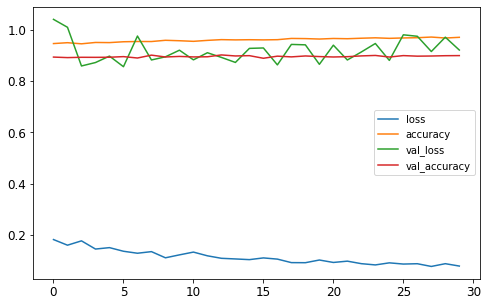

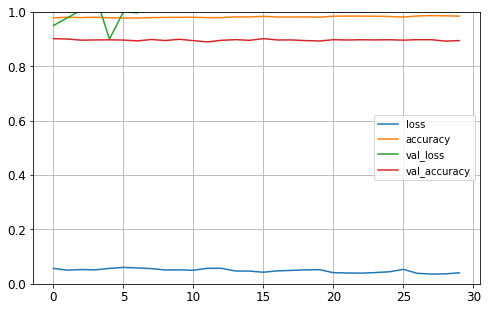

In [55]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# question 3 : epochs variation 

In [56]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0812 - accuracy: 0.9711 - val_loss: 1.0515 - val_accuracy: 0.8968
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0791 - accuracy: 0.9715 - val_loss: 1.0826 - val_accuracy: 0.8980
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0825 - accuracy: 0.9700 - val_loss: 1.0006 - val_accuracy: 0.8972
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0810 - accuracy: 0.9710 - val_loss: 1.0039 - val_accuracy: 0.8950
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0885 - accuracy: 0.9697 - val_loss: 1.0391 - val_accuracy: 0.9002
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0778 - accuracy: 0.9720 - val_loss: 0.9658 - val_accuracy: 0.8900
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0831 - accuracy: 0.9715 - val_loss: 0.8575 - val_accuracy:

In [57]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 1.0201 - accuracy: 0.8868


[1.0200610160827637, 0.8867999911308289]

In [58]:
# Epochs = 20
history8 = model.fit(X_train, y_train, batch_size=32, epochs=20,
                    validation_data=(X_valid, y_valid))



Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0763 - accuracy: 0.9741 - val_loss: 1.1462 - val_accuracy: 0.8982
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0708 - accuracy: 0.9745 - val_loss: 1.0025 - val_accuracy: 0.8948
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0747 - accuracy: 0.9739 - val_loss: 1.0018 - val_accuracy: 0.8968
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0763 - accuracy: 0.9729 - val_loss: 0.9422 - val_accuracy: 0.8926
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0678 - accuracy: 0.9756 - val_loss: 1.1639 - val_accuracy: 0.8902
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0779 - accuracy: 0.9735 - val_loss: 0.9698 - val_accuracy: 0.8942
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0674 - accuracy: 0.9756 - val_loss: 1.0132 - val_accuracy:

In [59]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.1668 - accuracy: 0.8875


[1.1667941808700562, 0.887499988079071]

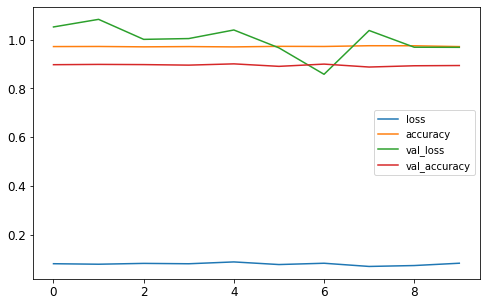

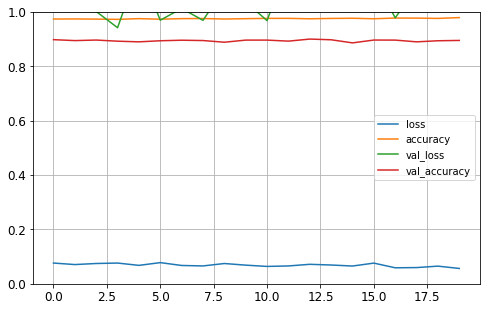

In [60]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
# Question 4

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(150, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [62]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history9 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8762 - accuracy: 0.6848 - val_loss: 0.4479 - val_accuracy: 0.8402
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5708 - accuracy: 0.7973 - val_loss: 0.4179 - val_accuracy: 0.8462
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5150 - accuracy: 0.8171 - val_loss: 0.3818 - val_accuracy: 0.8638
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4871 - accuracy: 0.8277 - val_loss: 0.3889 - val_accuracy: 0.8550
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4658 - accuracy: 0.8344 - val_loss: 0.3629 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4525 - accuracy: 0.8382 - val_loss: 0.3632 - val_accuracy: 0.8696
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4443 - accuracy: 0.8431 - val_loss: 0.3576 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
pd.DataFrame(history9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()